# Construindo imagens Ground Truth

In [32]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
from PIL import Image
import numpy as np
import math

# Read GT data
data = loadmat("../../Dataset/VIS_Onboard/HorizonGT/MVI_0790_VIS_OB_HorizonGT")

# Get the number of frames
#frames_number = len(data['structXML'][0])

## Exibindo a linha do horizonte na  imagem

Este código exemplifica como imprimir a linha do horizonte em uma imagem a partir dos dados do arquivo GT.

A linha GT do horizonte é traçada como uma linha reta, com seu ponto central em (x, y). Para determinar sua inclinação encontre o ângulo corresondente à cos alpha ou sen de alpha.

Para realizar a transformação de rotação na linha do horizonte deve-se converter as coordenadas, aplicar a transformação e somá-la à transformação atual da imagem.

(array([[960.5]]), array([[466.36252683]]), array([[0.02444696]]), array([[0.99970113]]))


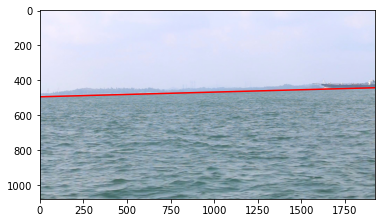

In [10]:
# ==== Draw horizon line for the image ====
# Read de base image
frame_number = 0
im = np.array(Image.open("../../Dataset/VIS_Onboard/VIS_Onboard_frames/MVI_0790_VIS_OB_frame" + str(frame_number) + ".jpg"), dtype=np.uint8)

# horizon = data frame <frame_number> -> (x, y, cos alpha, sen alpha) - See Explanation of GT files
horizon = data['structXML'][0][frame_number]
print(horizon)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create horizon line
line = plt.axhline(y=horizon[1], color='r', linestyle='-')

# Convert coordinates
ts = ax.transData
coords = ts.transform((horizon[0][0][0], horizon[1][0][0]))

# -- Rotate line --
# Rotate the line around x, y in alpha degrees
t = mtransforms.Affine2D().rotate_deg_around(coords[0], coords[1], math.asin(horizon[3]))
line.set_transform(line.get_transform() + t)

plt.show()

## Gerando imagens GT

Essa seção traz dois exemplo: como gera o GT para uma imagem e como gerar para todas as imagens do arquivo GT. O arquivo GT ainda deve ser especificado para os dois casos (na primeira célula de código).



### Gera GT frame 0
Gera a imagem GT para um único frame. O frame deve ser especificado.

Uma imagem base é usada para se saber as dimensões com que a imagem GT deve ser criada.

Uma matriz com as mesmas dimensões da imagem base é criada para representar a imagem GT, em que 1 representa os pixels que constituem a linha do horizonte e 0 os que não constituem.

Ao se criar a figura que será plotada deve-se passar suas dimensões em polegadas e deve ser exibida em escalas de cinza.

dimensões da matriz: 1080 x 1920
dimensões da matriz em polegada: 11.250000036000001 x 20.000000064


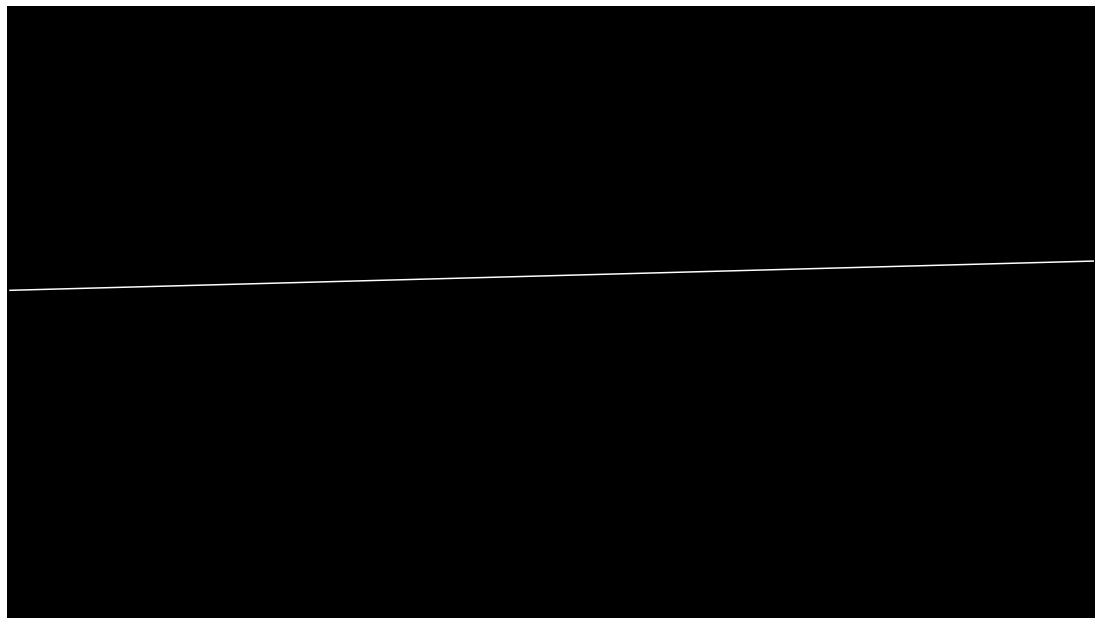

In [7]:
# Read de base image
frame_number = 0
im = np.array(Image.open("../../Dataset/VIS_Onboard/VIS_Onboard_frames/MVI_0790_VIS_OB_frame" + str(frame_number) + ".jpg"), dtype=np.uint8)

# Get image dimension
len_x, len_y = len(im), len(im[0])
print("dimensões da matriz: " + str(len_x) + ' x ' + str(len_y))

# Create Gt matrix image
gt = np.zeros((len_x, len_y), dtype=np.uint8)

# Dimension in inches
lenp_x, lenp_y = len_x * 0.0104166667, len_y * 0.0104166667
print("dimensões da matriz em polegada: " + str(lenp_x) + ' x ' + str(lenp_y))
# Create figure and axes
fig,ax = plt.subplots(figsize=(lenp_y, lenp_x))

# Display the image with gray scale
ax.imshow(gt, cmap='gray')

# horizon = data frame <frame_number> -> (x, y, cos alpha, sen alpha) - See Explanation of GT files
horizon = data['structXML'][0][frame_number]

# Create the horizon line
line = plt.axhline(y=horizon[1], color='1', linestyle='-')

# Convert coordinates
ts = ax.transData
coords = ts.transform((horizon[0][0][0], horizon[1][0][0]))

# Rotate line
# Rotate the line around x, y in alpha degrees
t = mtransforms.Affine2D().rotate_deg_around(coords[0], coords[1], math.asin(horizon[3]))
line.set_transform(line.get_transform() + t)

# Disable axis print
plt.axis("off")

plt.show()

# Save the image wihout padding
fig.savefig('GTimage.jpeg', format='jpeg', bbox_inches='tight', pad_inches=0)

### Gera GT de todos os frames

Gera as imagens GT para um todos frames do arquivo GT. Segue os mesmos parâmetros da seção acima.

(array([[960.5]]), array([[466.36252683]]), array([[0.02444696]]), array([[0.99970113]]))


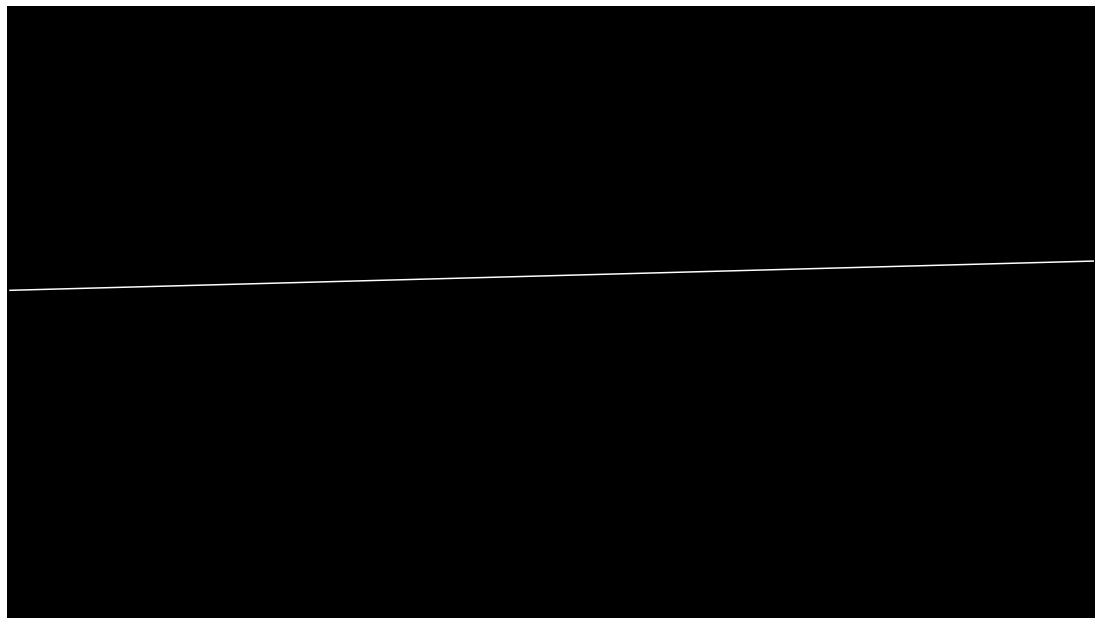

(array([[961]], dtype=uint16), array([[463.55002142]]), array([[0.02443214]]), array([[0.99970149]]))


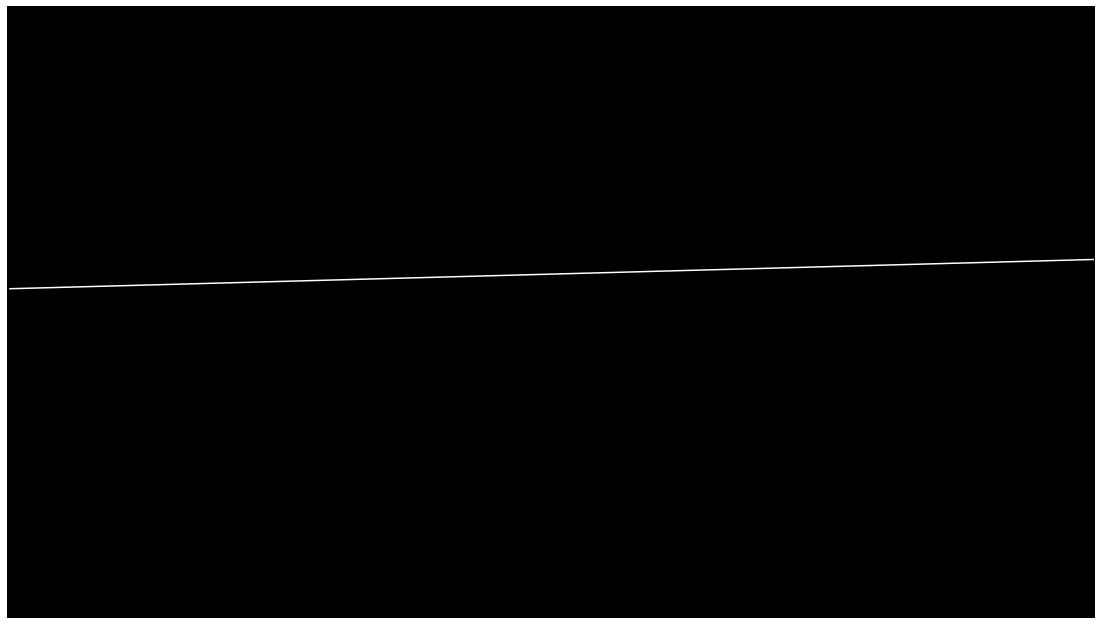

(array([[961]], dtype=uint16), array([[463.13924333]]), array([[0.02792168]]), array([[0.99961011]]))


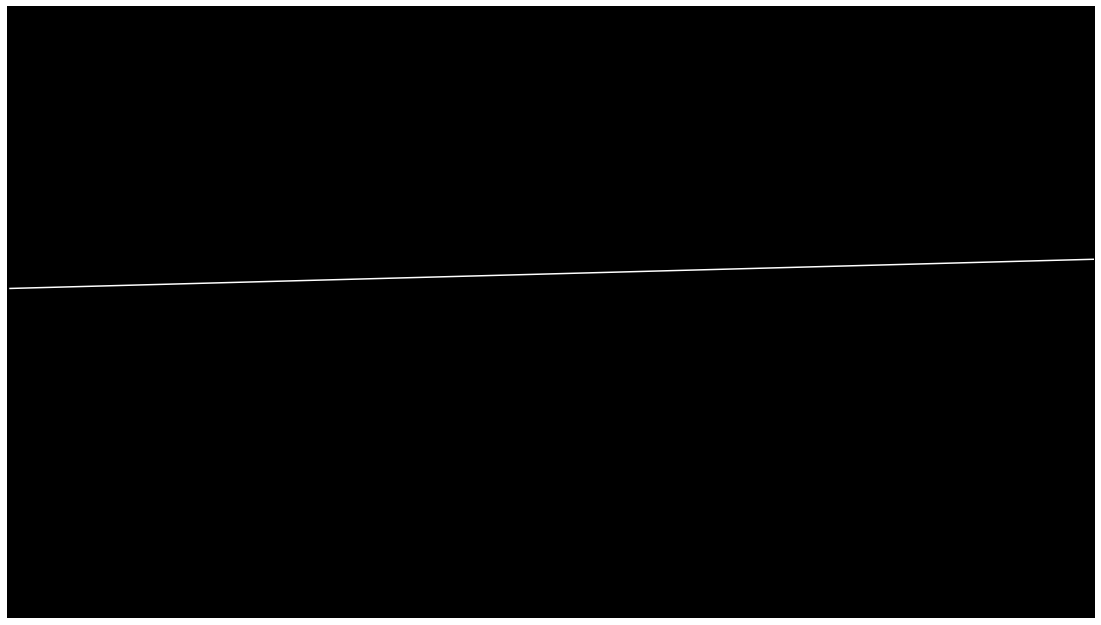

(array([[961]], dtype=uint16), array([[463.05263105]]), array([[0.02714626]]), array([[0.99963147]]))


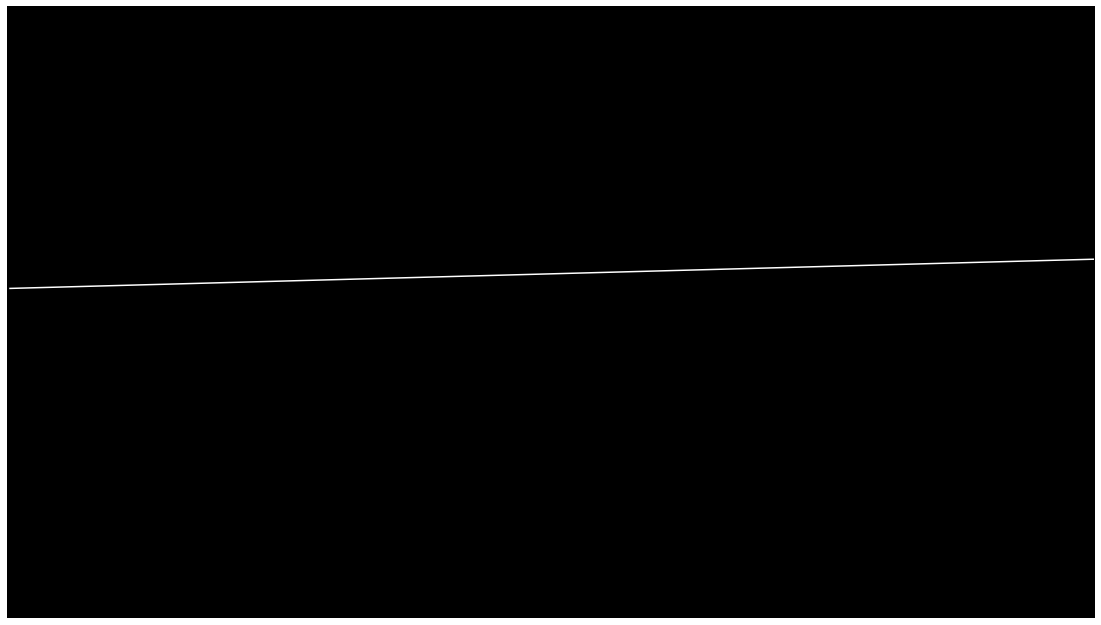

(array([[961]], dtype=uint16), array([[463.18799131]]), array([[0.02835785]]), array([[0.99959784]]))


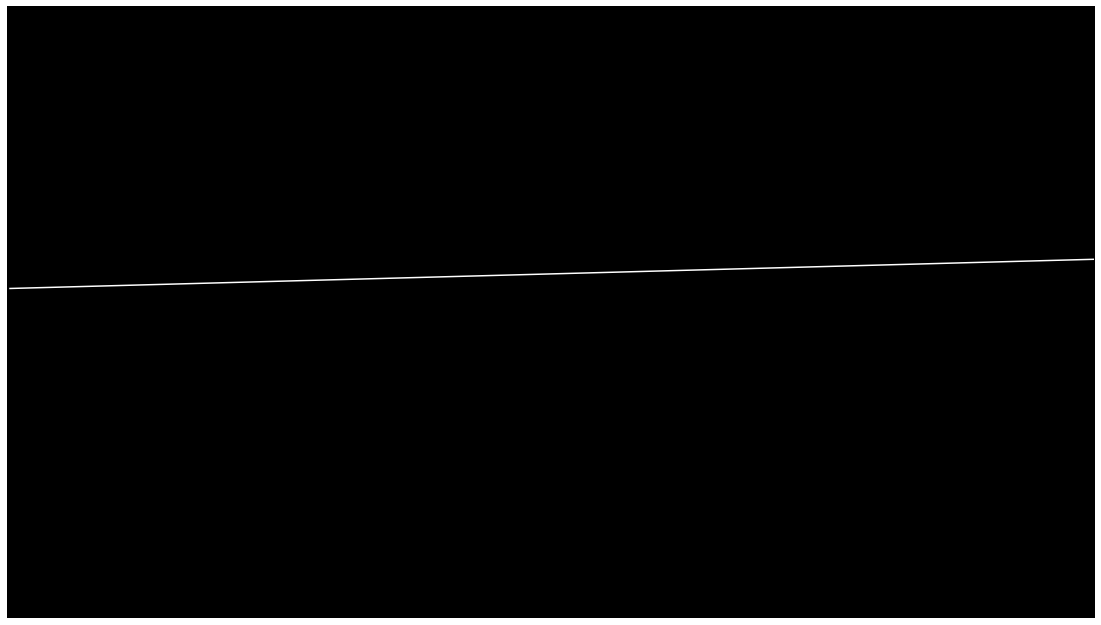

(array([[961]], dtype=uint16), array([[465.20898143]]), array([[0.03365362]]), array([[0.99943356]]))


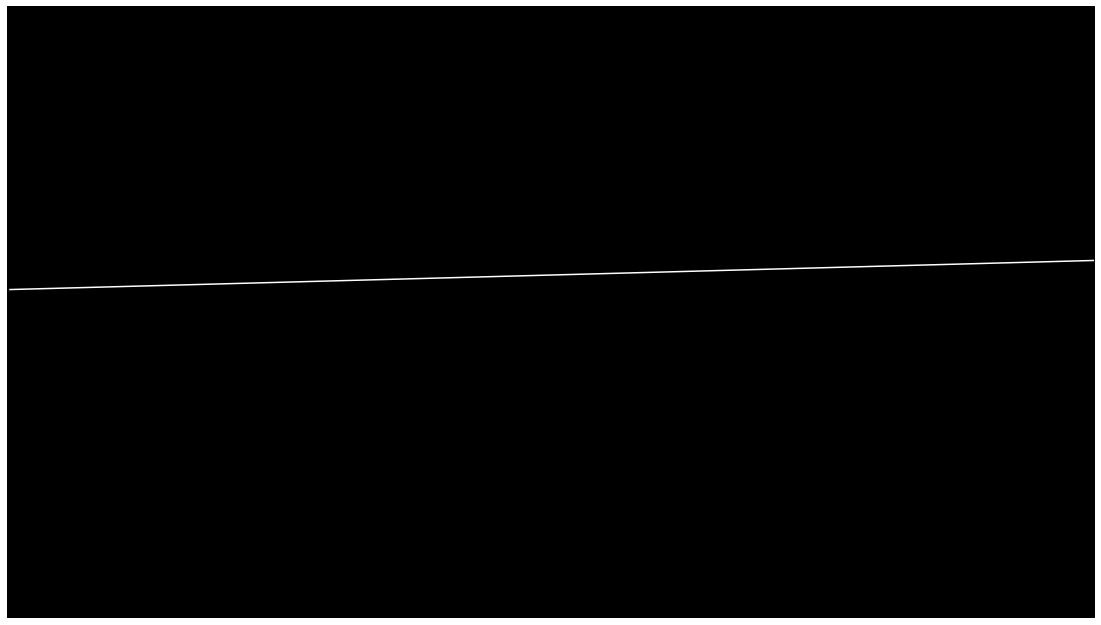

(array([[960.5]]), array([[463.66955851]]), array([[0.03143128]]), array([[0.99950592]]))


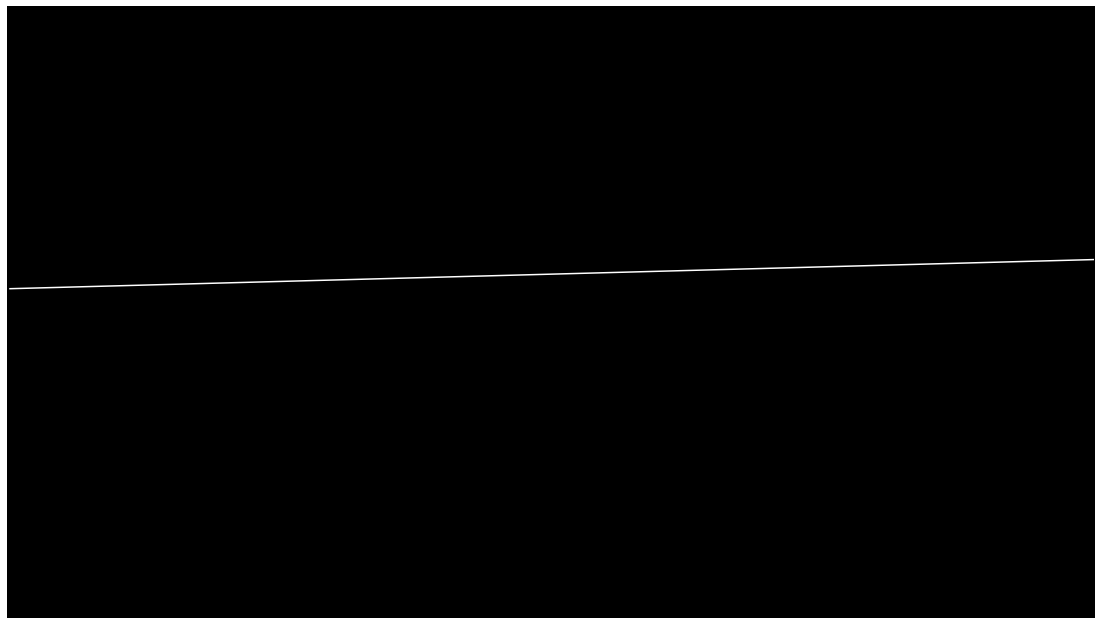

(array([[961]], dtype=uint16), array([[468.17134443]]), array([[0.0348995]]), array([[0.99939083]]))


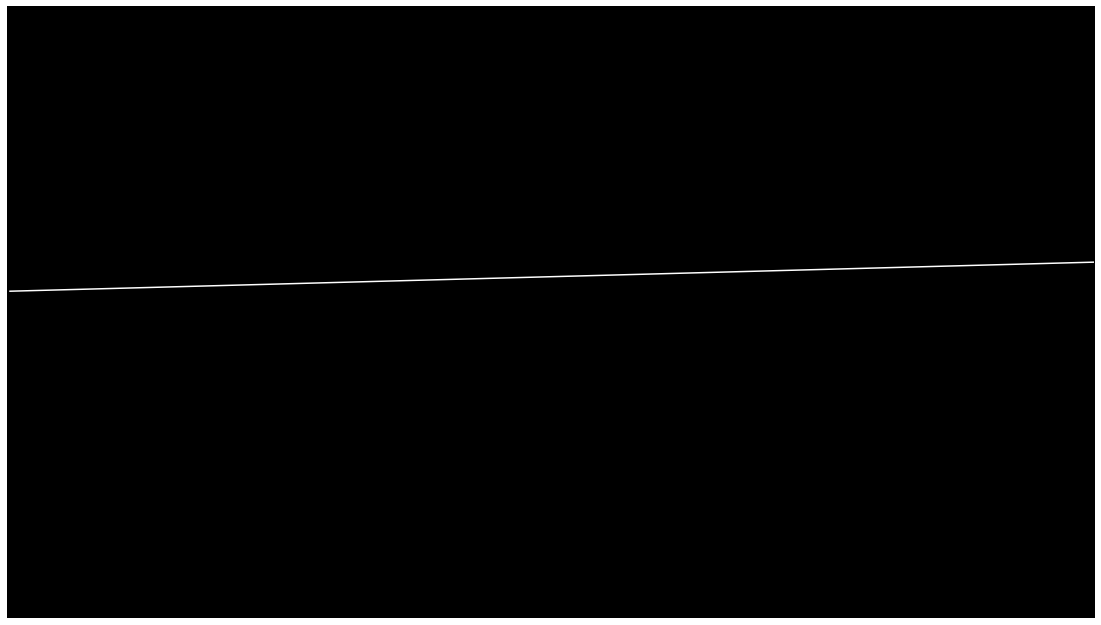

(array([[961]], dtype=uint16), array([[468.92180159]]), array([[0.0348995]]), array([[0.99939083]]))


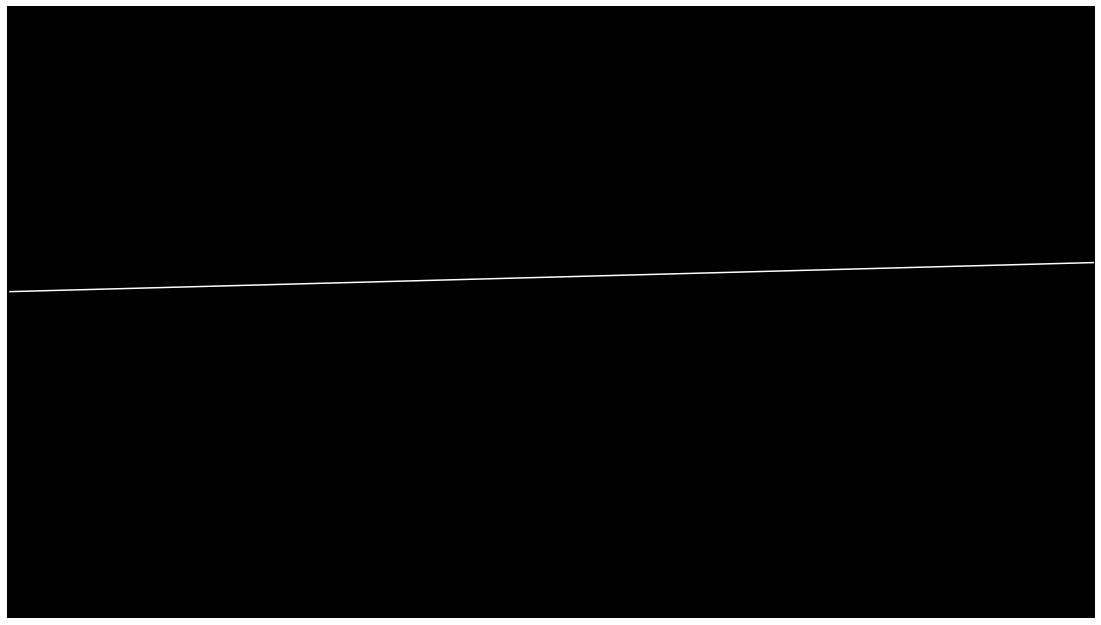

(array([[961]], dtype=uint16), array([[472.92423976]]), array([[0.0348995]]), array([[0.99939083]]))


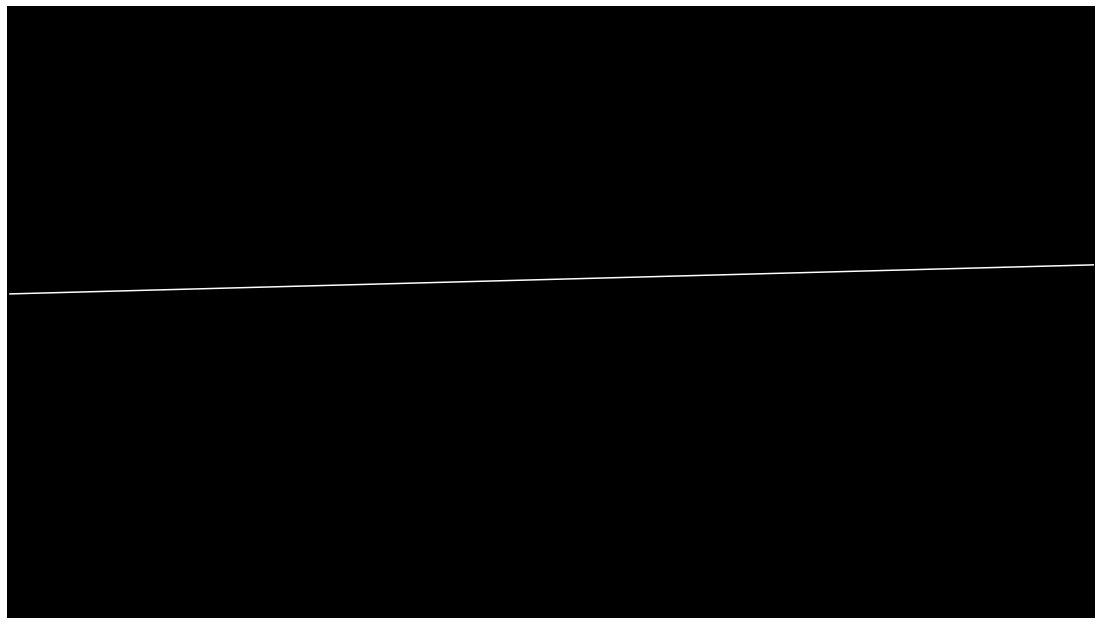

KeyboardInterrupt: 

In [8]:
# Read de base image
im = np.array(Image.open("../../Dataset/VIS_Onboard/VIS_Onboard_frames/MVI_0790_VIS_OB_frame0.jpg"), dtype=np.uint8)

# Get image dimension
len_x, len_y = len(im), len(im[0])

# frame_number is used to control the frame number
frame_number = 0
# horizon = data frame <count> -> (x, y, cos alpha, sen alpha) - See Explanation of GT files
for horizon in data['structXML'][0]:
    print(horizon)
    # Create Gt matrix image
    gt = np.zeros((len_x, len_y), dtype=np.uint8)

    # Dimension in inches
    lenp_x, lenp_y = len_x * 0.0104166667, len_y * 0.0104166667
    # Create figure and axes
    fig,ax = plt.subplots(figsize=(lenp_y, lenp_x))

    # Display the image with gray scale
    ax.imshow(gt, cmap='gray')

    # Create horizon line
    line = plt.axhline(y=horizon[1], color='1', linestyle='-')

    # Convert coordinates
    ts = ax.transData
    coords = ts.transform((horizon[0][0][0], horizon[1][0][0]))

    # Rotate line
    # Rotate the line around x, y in alpha degrees
    t = mtransforms.Affine2D().rotate_deg_around(coords[0], coords[1], math.asin(horizon[3]))
    line.set_transform(line.get_transform() + t)

    # Disable axis print
    plt.axis("off")

    plt.show()

    # Save the image wihout padding
    fig.savefig('GT' + str(frame_number) + '.jpeg', format='jpeg', bbox_inches='tight', pad_inches=0)
    frame_number = frame_number + 1

In [29]:
# Exemlo como abrir imagem
from PIL import Image, ImageDraw
import PIL
import math

"""
with Image.open("image.png") as im:

    draw = ImageDraw.Draw(im)
    draw.line((0, 0) + im.size, fill=128)
    draw.line((0, im.size[1], im.size[0], 0), fill=128)

    # write to stdout
    im.save("image2.png", "PNG")
"""

'\nwith Image.open("image.png") as im:\n\n    draw = ImageDraw.Draw(im)\n    draw.line((0, 0) + im.size, fill=128)\n    draw.line((0, im.size[1], im.size[0], 0), fill=128)\n\n    # write to stdout\n    im.save("image2.png", "PNG")\n'

In [31]:
# Exemlo como criar imagem e roacionar linha
im = PIL.Image.new('1', (400, 400))
draw = ImageDraw.Draw(im)

draw.line((0,200, 400, 200), fill=1, width=3)

# coseno e seno do anglo
c, s = math.cos(math.radians(45)), math.sin(math.radians(45))

# ono cenral
cx = 200
cy = 200

# onos iniciais
x1 = 0 # inicio
y1 = cy
x2 = 400 # fim imagem
y2 = cy

# onos roacionados
xr1 = c*(x1-cx) - s*(y1-cy) + cx
yr1 = s*(x1-cx) + c*(y1-cy) + cy
xr2 = c*(x2-cx) - s*(y2-cy) + cx
yr2 = s*(x2-cx) + c*(y2-cy) + cy


# dram line
draw.line((xr1, yr1, xr2, yr2), fill=1, width=5)

im.show()

In [55]:
# Alicando linha roacionada na imagem


# Read GT data
data = loadmat("../../Dataset/VIS_Onboard/HorizonGT/MVI_0788_VIS_OB_HorizonGT")

# Read de base image
frame_number = 0
base = np.array(Image.open("../../Dataset/VIS_Onboard/VIS_Onboard_frames/MVI_0788_VIS_OB_frame" + str(frame_number) + ".jpg"), dtype=np.uint8)

# Get image dimension
len_y, len_x = len(base), len(base[0])
print("dimensões da matriz: " + str(len_x) + ' x ' + str(len_y))

# Create Gt image
#gt = PIL.Image.new('1', (len_x, len_y))
gt = Image.open("../../Dataset/VIS_Onboard/VIS_Onboard_frames/MVI_0788_VIS_OB_frame" + str(frame_number) + ".jpg")

# Display the image
draw = ImageDraw.Draw(gt)

# horizon = data frame <frame_number> -> (x, y, cos alpha, sen alpha) - See Explanation of GT files
horizon = data['structXML'][0][frame_number]
print(horizon)


# --- Create the horizon line ---
# coseno e seno do anglo
c, s = horizon[2], horizon[3]
print(c)
print(s)

rad = math.asin(horizon[3]) - math.radians(90)
print("======")
c, s = math.cos(rad), math.sin(rad)
print(c)
print(s)


# ono cenral
cx = horizon[0]
cy = horizon[1]

# onos iniciais
x1 = 0 # inicio
y1 = cy
x2 = len_x # fim imagem
y2 = cy

# onos roacionados
xr1 = c*(x1-cx) - s*(y1-cy) + cx
yr1 = s*(x1-cx) + c*(y1-cy) + cy
xr2 = c*(x2-cx) - s*(y2-cy) + cx
yr2 = s*(x2-cx) + c*(y2-cy) + cy

# ----------------------------------------------

# dram line
draw.line((xr1, yr1, xr2, yr2), fill=1, width=1)

gt.show()

# Save the image wihout padding

dimensões da matriz: 1920 x 1080
(array([[960.5]]), array([[421.85573106]]), array([[0.04375699]]), array([[0.9990422]]))
[[0.04375699]]
[[0.9990422]]
0.9990422040390107
-0.043756994285208385


A imagem esá ficando 1s 90 graus errada (Arrmado. Why?)